#### Environment set up

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%cd /gdrive/My\ Drive/ProgettoAI/ProgettoAI

/gdrive/My Drive/ProgettoAI/ProgettoAI


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import random
from PIL import Image
import warnings
import cv2


warnings.filterwarnings('ignore')

In [ ]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
tf.compat.v1.set_random_seed(seed)

#### Counts of files and labels

In [ ]:
train_folder ='dataset_preprocessed'
csv_file = train_folder + '/labels_train.csv'

In [ ]:
df = pd.read_csv(r'dataset_preprocessed/labels_train.csv')
df = pd.DataFrame(df, columns = ['file','label'])
df.head()

,file,label
0,P00001_1.png,N
1,P00001_2.png,N
2,P00002_1.png,N
3,P00003_1.png,N
4,P00004_1.jpeg,N


In [ ]:
#extract name of files from df
file_names = df['file'].tolist()
file_names = sorted(file_names)

#check length
n_file_names = len(file_names)
print('Il numero di file associati alle label è %d' % n_file_names)

Il numero di file associati alle label è 15470


In [ ]:
#verify if a name is present more than once 
file_for_real = np.unique(np.array(file_names))
n_file_for_real = len(file_for_real)

print('Il numero di file effettivo è %d' %n_file_for_real) 

#if a patient has more than a label, it seems that it should be associated to two different images anyway

Il numero di file effettivo è 15470


In [ ]:
#check number of images
images = os.listdir(train_folder)
images = sorted(images)
n_images = len(images)
print('Il numero di immagini è %d' %n_images)

Il numero di immagini è 15471


In [ ]:
#values present as images but not in csv
missing = np.setdiff1d(images, file_names)
print(missing)
print('\nNumber of files which do not correspond is: %d' %len(missing))

['labels_train.csv']

Number of files which do not correspond is: 1


In [ ]:
images.remove('labels_train.csv')
len(images)

15470

In [ ]:
#extract patients
patients = sorted(list(set(i[:6] for i in images)))
patients[:5]

ID = []
#add patient ID column to df
for i in range(0, len(df)):
  ID.append(df.file[i][:6])

df['ID'] = ID
df[['ID', 'file', 'label']]

,ID,file,label
0,P00001,P00001_1.png,N
1,P00001,P00001_2.png,N
2,P00002,P00002_1.png,N
3,P00003,P00003_1.png,N
4,P00004,P00004_1.jpeg,N
...,...,...,...
15465,P16111,P16111_1.png,N
15466,P16112,P16112_1.jpeg,N
15467,P16113,P16113_1.png,N
15468,P16114,P16114_1.png,T


In [ ]:
n_patients = len(patients)
print('Number of patients is: %d' %n_patients)
print('\nNumber of patients with more than an image is %d' %(len(images) - n_patients))

Number of patients is: 12086

Number of patients with more than an image is 3384


In [ ]:
# check
len(np.unique(df.ID))

12086

In [ ]:
# compute how many imgs for patient
imgs_per_patient = {}
for img in images:
  p_idx = img[:6]
  imgs_per_patient[p_idx] = imgs_per_patient.get(p_idx, 0) + 1

In [ ]:
n_p1 = list(imgs_per_patient.values()).count(1)
n_p2 = list(imgs_per_patient.values()).count(2)
n_p3 = list(imgs_per_patient.values()).count(3)

print(f'Number of patients with 1 image: {n_p1}')
print(f'Number of patients with 2 image: {n_p2}')
print(f'Number of patients with 3 image: {n_p3}')

Number of patients with 1 image: 8702
Number of patients with 2 image: 3384
Number of patients with 3 image: 0


In [ ]:
#calculate occurrences
labels = df['label'].tolist()

healthy = 0
tubercolosi = 0
pneumonia = 0


for i, etichetta in enumerate(labels):
  if etichetta == 'N':
    healthy +=1
  elif etichetta == 'P':
    pneumonia += 1
  else:
    tubercolosi +=1

print('Healthy subjects are: %d \nAffected by tuberculosis: %d \nAffected by pneumonia: %d' %(healthy, tubercolosi, pneumonia))



Healthy subjects are: 9354 
Affected by tuberculosis: 1866 
Affected by pneumonia: 4250


In [ ]:
healthy + pneumonia + tubercolosi

15470

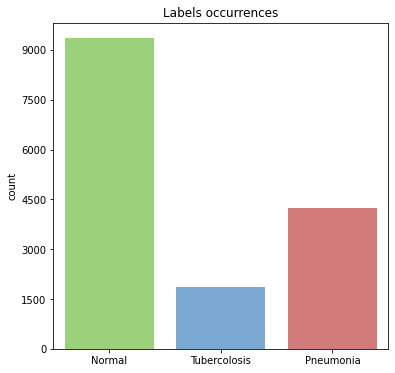

In [ ]:
fig = plt.figure(figsize = (6,6))
sns.countplot(labels, palette=['#98DF6D',"#6DAADF",'#DF6D6D'])
plt.title('Labels occurrences')
plt.xticks([0, 1, 2], ['Normal', 'Tubercolosis', 'Pneumonia'])
plt.yticks(np.arange(0, 10000, 1500))
plt.savefig('chart.png')

#### Visualization

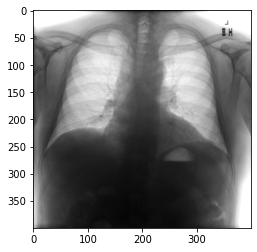

In [ ]:
#try to visualize just one image
title =  random.choice(images)
path = train_folder + '/' + title
img = Image.open(path, mode='r')

fig = plt.figure(figsize = (4,4))
plt.imshow(np.uint8(img), cmap = 'gray', vmin=0, vmax=255)

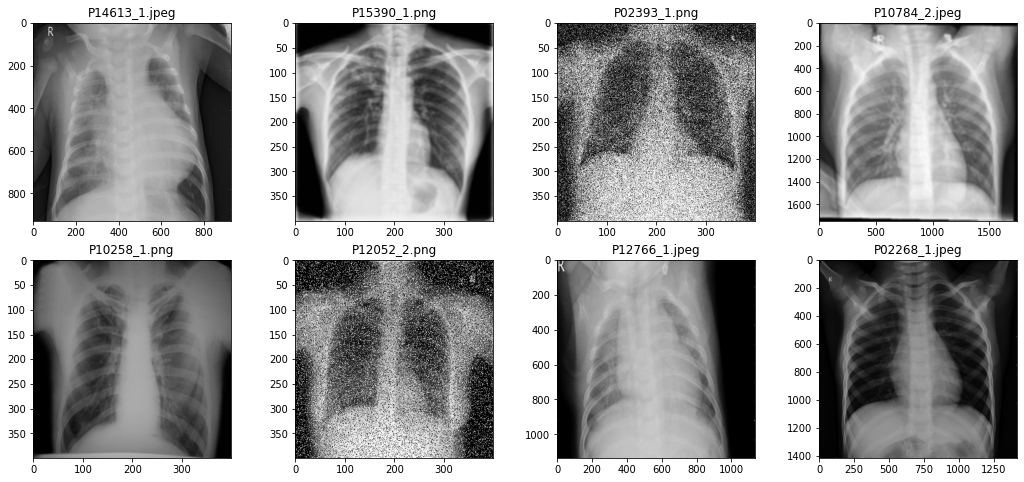

In [ ]:
#visualize a batch of random images
fig, axs = plt.subplots(2, 4, figsize = (18,8))

for j in range(0,2):
  for i in range(0,4):
    title =  random.choice(images)
    path = train_folder + '/' + title
    img = Image.open(path, mode='r')
   

    axs[j,i].imshow(np.uint8(img),cmap = 'gray', vmin=0, vmax=255)
    axs[j,i].set_title(title)

  #histograms
  

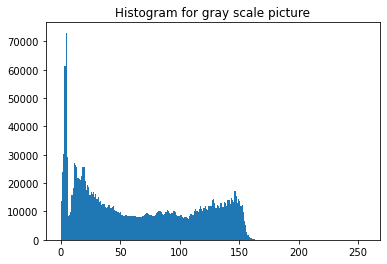

In [ ]:
#single histogram
gray_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

hist = cv2.calcHist([gray_img],[0],None,[256],[0,256])

plt.hist(gray_img.ravel(),256,[0,256])
plt.title('Histogram for gray scale picture')
plt.show()

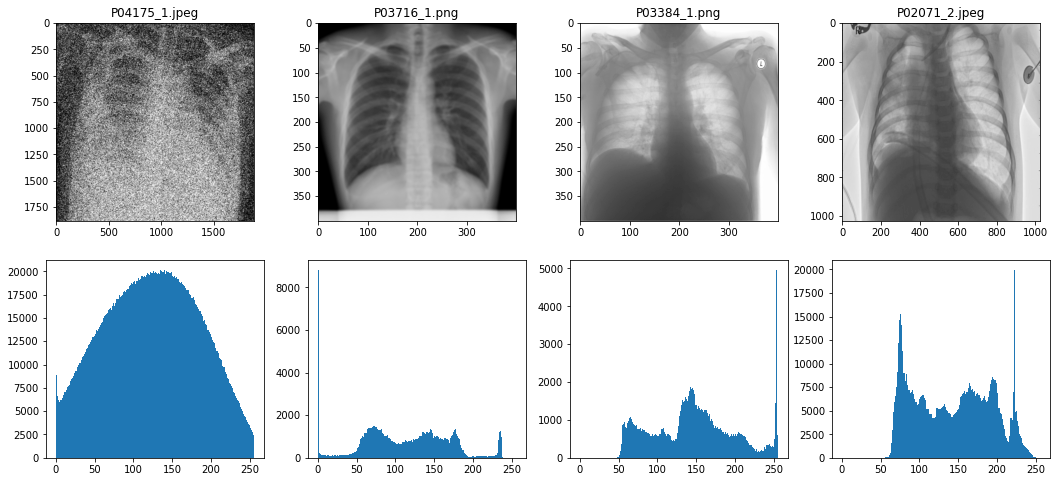

In [ ]:
fig, axs = plt.subplots(2, 4, figsize = (18,8))

for i in range(0,4):
  title =  random.choice(images)
  path = train_folder + '/' + title
  img = Image.open(path, mode='r')

  axs[0,i].imshow(np.uint8(img),cmap = 'gray', vmin=0, vmax=255)
  axs[0,i].set_title(title)
  
  img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  hist = cv2.calcHist([img2],[0],None,[256],[0,256])

  axs[1,i].hist(img2.ravel(),256,[0,256])
  axs[0,i].set_title(title)

### Pre-Processing

In [ ]:
#Images sizes

#dimensions = np.zeros((len(images), 2))

# for i in range(0, len(images)):
#   nome = images[i]
#   path = train_folder + '/' + nome
#   img = np.array(Image.open(path, mode='r'))
#   dimensions[i] = img.shape

dimensions = np.load('SarasRoom/dimensions.npy')


In [ ]:
dimensions[:, 1].min()
dimensions[:, 0].min()

399.0

In [ ]:
plot = plt.hist(immagine.ravel(),256,[0,256])

255.0

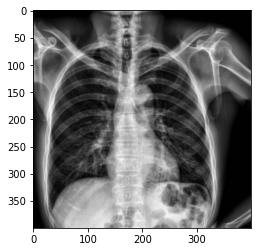

In [ ]:
# CLAHE
image = cv2.imread("dataset_clean/P00001_2.png")
image = cv2.resize(image, (400, 400))
image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# The declaration of CLAHE
clahe = cv2.createCLAHE(clipLimit = 2)
final_img = clahe.apply(image_bw)
 
plt.imshow(final_img,cmap = 'gray')
